In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.shape

(42000, 785)

In [4]:
print(df.columns)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [5]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
data = df.values

In [9]:
x = data[:,1:]
y = data[:,0]

In [11]:
split = 0.8*x.shape[0]
split = int(split)
split

33600

In [15]:
x_train = x[:split,:]
y_train = y[:split]

In [16]:
x_test = x[split:,:]
y_test = y[split:]

In [17]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(33600, 784) (33600,)
(8400, 784) (8400,)


In [18]:
#Visualize and draw sample images
def drawImg(sample):
    img = sample.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.show()

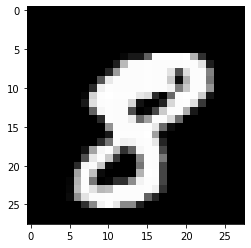

8


In [21]:
drawImg(x_train[10])
print(y_train[10])

In [22]:
#Step 2: Apply KNN

In [23]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

In [24]:
def knn(X,Y,queryPoint,k=5):
    
    vals = []
    m = X.shape[0]
    
    for i in range(m):
        d = dist(queryPoint,X[i])
        vals.append((d,Y[i]))
        
    
    vals = sorted(vals)
    # Nearest/First K points
    vals = vals[:k]
    
    vals = np.array(vals)
    
    #print(vals)
    
    new_vals = np.unique(vals[:,1],return_counts=True)
    #print(new_vals)
    
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    
    return pred

In [25]:
#Step 3: Make Prediction

In [28]:
pred = knn(x_train,y_train,x_test[5])

In [29]:
print(int(pred))

6


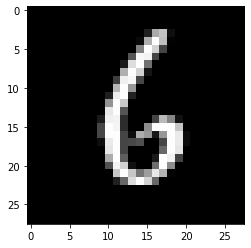

In [30]:
drawImg(x_test[5])